# Apps Project

by [Sonjoy Das, PhD](https://www.linkedin.com/in/sonjoy-das-9b323213/)

***

Welcome to the Apps project! We're going to walk through the kind of notebook typically done by a data scientist. In the process, we'll be sure to signpost the general framework for our investigation - the Data Science Pipeline - as well as give reasons for why we're doing what we're doing. We're also going to apply some of the skills and knowledge that you will find in Professor Spiegelhalter's excellent book *The Art of Statistics* (hereinafter *AoS*). 

So let's get cracking!

**Context**
You're a data scientist and programmer integrating an app store into a custom operating system you're designing. You can choose to integrate the Apple Store or Google Play, but not both. You want to use the platform that sells the best quality apps. You decide to use the app ratings as a quality metric and gather some data about rating from the two stores. 

In this case study, you'll analyze whether there is a significant difference between the ratings on these two platforms that would justify choosing one over the other. If there's not, you can always just flip a coin to pick which platform to use at random. 

**Brief**

Did Apple Store apps receive better reviews than Google Play apps?

## Stages of the project

1. Sourcing and loading 
    * Load the two datasets
    * Pick the columns that we are going to work with 
    * Subsetting the data on this basis 
 
 
2. Cleaning, transforming and visualizing
    * Check the data types and fix them
    * Add a `platform` column to both the `Apple` and the `Google` dataframes
    * Changing the column names to prepare for a join 
    * Join the two data sets
    * Eliminate the `NaN` values
    * Filter only those apps that have been reviewed at least once
    * Summarize the data visually and analytically (by the column `platform`)  
  
  
3. Modelling 
    * Hypothesis formulation
    * Getting the distribution of the data
    * Permutation test
    * Bootstrap hypothesis test


4. Evaluating and concluding 
    * What is our conclusion?
    * What is our decision?
    * Other models we could have used. 
    

## Importing the libraries

In this case we are going to import pandas, numpy, scipy, random, matplotlib.pyplot, and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random
# seaborn plot
import seaborn as sns
# To test how Mlxtend library perform in permutation test
from mlxtend.evaluate import permutation_test

## Stage 1 -  Sourcing and loading data

### 1a. Source and load the data
Let's download the data from Kaggle. Kaggle is a fantastic resource: a kind of social medium for data scientists, it boasts projects, datasets and news on the freshest libraries and technologies all in one place. The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).
Download the datasets and save them in your working directory.

In [2]:
# Now that the files are saved, we want to load them into Python using read_csv and pandas.

# Create a variable called google, and store in it the path of the csv file that contains your google dataset. 
# If your dataset is in the same folder as this notebook, the path will simply be the name of the file. 
google = 'googleplaystore.csv'

# Read the csv file into a data frame called Google using the read_csv() pandas method.
Google = pd.read_csv(google)

# Using the head() pandas method, observe the first three entries.
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
# Create a variable called apple, and store in it the path of the csv file that contains your apple dataset. 
apple = 'AppleStore.csv'

# Read the csv file into a pandas DataFrame object called Apple.
Apple = pd.read_csv(apple)

# Observe the first three entries like you did with your other data. 
Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


### 1b. Pick the columns we'll work with

From the documentation of these datasets, we can infer that the most appropriate columns to answer the brief are:

1. Google:
    * `Category` # Do we need this?
    * `Rating`
    * `Reviews`
    * `Price` (maybe)
2. Apple:    
    * `prime_genre` # Do we need this?
    * `user_rating` 
    * `rating_count_tot`
    * `price` (maybe)

### 1c. Subsetting accordingly

Let's select only those columns that we want to work with from both datasets.

In [4]:
# Subset our DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
Google1 = Google[['Category', 'Rating', 'Reviews', 'Price']]

# Check the first three entries
Google1.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [5]:
# Do the same with our Apple object, selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple1 = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

# Let's check the first three entries
Apple1.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check the data types for both Apple and Google, and fix them

Types are crucial for data science in Python. Let's determine whether the variables we selected in the previous section belong to the types they should do, or whether there are any errors here. 

In [6]:
# Using the dtypes feature of pandas DataFrame objects, check out the data types within our Apple dataframe.
# Are they what you expect?
Apple1.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

This is looking healthy. But what about our Google data frame?

In [7]:
# Using the same dtypes feature, check out the data types of our Google dataframe. 
Google1.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

Weird. The data type for the column 'Price' is 'object', not a numeric data type like a float or an integer. Let's investigate the unique values of this column. 

In [8]:
# Use the unique() pandas method on the Price column to check its unique values. 
Google1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [9]:
Google1['Price'].value_counts().head(12)

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
Name: Price, dtype: int64

In [10]:
Google1['Price'].value_counts().tail(12)

$3.02       1
$2.56       1
$200.00     1
$2.95       1
$74.99      1
$89.99      1
$2.90       1
Everyone    1
$2.59       1
$1.50       1
$19.40      1
$25.99      1
Name: Price, dtype: int64

Aha! Fascinating. There are actually two issues here. 

- Firstly, there's one price called `Everyone`. That needs to be cleaned.
- Secondly, there are dollar symbols everywhere! 


Let's address the first issue first. Let's check the datapoints that have the price value `Everyone`

In [11]:
# Let's check which data points have the value 'Everyone' for the 'Price' column by subsetting our Google dataframe.

# Subset the Google dataframe on the price column. 
# To be sure: you want to pick out just those rows whose value for the 'Price' column is just 'Everyone'. 
idx = Google1.index[Google1['Price']=='Everyone'].values
print(idx)

[10472]


Let's get rid of this one row.

In [12]:
# Let's eliminate that row. 

# Subset our Google dataframe to pick out just those rows whose value for the 'Price' column is NOT 'Everyone'. 
# Reassign that subset to the Google variable. 
# You can do this in two lines or one. Your choice! 
Google2 = Google1.drop(idx)

# Check again the unique values of Google
Google2['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Our second problem remains: I'm seeing dollar symbols when I close my eyes! (And not in a good way). 

This is a problem because Python actually considers these values strings. So we can't do mathematical and statistical operations on them until we've made them into numbers. 

In [13]:
# Let's create a variable called nosymb.
# This variable will take the Price column of Google and apply the str.replace() method. 
# %timeit Google2['Price'].str.replace('$','')

In [14]:
print('The str.replace() method takes: 21 ms ± 6.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)')

The str.replace() method takes: 21 ms ± 6.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
# nosymb = Google2['Price'].str.replace('$','')

In [16]:
# Now we need to do two things:
# i. Make the values in the nosymb variable numeric using the to_numeric() pandas method.
# ii. Assign this new set of numeric, dollar-sign-less values to Google['Price']. 
# You can do this in one line if you wish.
# %timeit pd.to_numeric(nosymb)

In [17]:
print('The .to_numeric() pandas method takes: 39.8 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)')

The .to_numeric() pandas method takes: 39.8 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
# Google2['Price'] = pd.to_numeric(nosymb)

However, there is a better scheme to remove the `$`. See this [article](https://towardsdatascience.com/5-methods-to-remove-the-from-your-data-in-python-and-the-fastest-one-281489382455) for more details. We are going to use list comprehension with the `.strip()` method since this very fast (much faster than the above `str.replace()` and `.to_numeric()` methods) and does not chop off any other character except `$`.

In [19]:
# %timeit [x.strip('$') for x in Google2.Price]

In [20]:
print('The list comprehension with the .strip() method takes: 2.42 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)')

The list comprehension with the .strip() method takes: 2.42 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
Google2.Price = [x.strip('$') for x in Google2.Price]


In [22]:
# %timeit Google2['Price'].astype(float)


In [23]:
print('The .astype() method takes: 1.58 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)')

The .astype() method takes: 1.58 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
Google2['Price'] = Google2['Price'].astype(float)

In [25]:
Google2['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [26]:
Google2['Price'].value_counts().head(12)

0.00      10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
Name: Price, dtype: int64

In [27]:
Google2['Price'].value_counts().tail(12)

15.99    1
25.99    1
1.59     1
2.59     1
4.84     1
2.90     1
28.99    1
1.61     1
4.80     1
4.60     1
3.88     1
14.00    1
Name: Price, dtype: int64

Now let's check the data types for our Google dataframe again, to verify that the 'Price' column really is numeric now.

In [28]:
# Use the function dtypes. 
Google2.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

Notice that the column `Reviews` is still an object column. We actually need this column to be a numeric column, too. Let's change it to integer since it reprents the number of reviews.

In [29]:
# Convert the 'Reviews' column to a numeric data type. 
Google2['Reviews'] = Google2['Reviews'].astype('int64')

In [30]:
# Let's check the data types of Google again
Google2.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the problem in our brief. 

In [31]:
print(f"There are {len(Apple1.columns)} columns in Apple1 dataframe")
print()
print(f"There are {len(Google2.columns)} columns in Google2 dataframe")
print()

There are 4 columns in Apple1 dataframe

There are 4 columns in Google2 dataframe



In [32]:
# Create or insert a column called 'platform' in both the Apple and Google dataframes. 
# Add the value 'apple' and the value 'google' as appropriate. 
# Apple1['platform'] = 'apple'
# Google2['platform'] = 'google'
Apple1.insert(len(Apple1.columns), 'platform', 'apple', allow_duplicates=False)
Google2.insert(len(Google2.columns), 'platform', 'google', allow_duplicates=False)

In [33]:
print(f"Now, there are {len(Apple1.columns)} columns in Apple1 dataframe")
print()
print(f"Now, there are {len(Google2.columns)} columns in Google2 dataframe")
print()

Now, there are 5 columns in Apple1 dataframe

Now, there are 5 columns in Google2 dataframe



In [34]:
Apple1.head()

,prime_genre,user_rating,rating_count_tot,price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


In [35]:
Google2.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


### 2c. Changing the column names to prepare for our join of the two datasets 
It is easy to join two datasets if they have both:
- the same number of columns
- the same column names

We need to rename the columns of `Apple` so that they're the same as the ones of `Google`, or vice versa.

In this case, we're going to change the `Apple` columns names to the names of the `Google` columns. 

This is an important step to unify the two datasets!

In [36]:
# Create a variable called old_names where you'll store the column names of the Apple dataframe. 
# Use the feature .columns.
old_names = Apple1.columns

# Create a variable called new_names where you'll store the column names of the Google dataframe. 
new_names = Google2.columns

# Use the rename() DataFrame method to change the columns names. 
Apple1 = Apple1.rename(columns = dict(zip(old_names,new_names)))

In [37]:
Apple1.head()

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


In [38]:
Google2.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


### 2d. Join the two datasets 
Let's combine the two datasets into a single data frame called `df`.

In [39]:
# Let's use the append() or concat () method to append Apple to Google. Note, 
# append() method is deprecated since version 1.4.0
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html
df = pd.concat([Apple1, Google2], ignore_index=True)


In [40]:
# Using the sample() method with the number 12 passed to it, check 12 random points of your dataset.
df.sample(n=12, random_state=41)


,Category,Rating,Reviews,Price,platform
9820,SOCIAL,4.3,3806669,0.00,google
5552,Games,0.0,0,0.00,apple
14579,FINANCE,NaN,0,0.00,google
17736,FINANCE,4.0,67,2.99,google
7410,BUSINESS,4.4,31614,0.00,google
17964,MEDICAL,3.8,63,0.00,google
9583,MEDICAL,4.1,1533,11.99,google
3962,Games,4.0,63,0.00,apple
17706,TOOLS,NaN,1,0.00,google
8481,HEALTH_AND_FITNESS,4.2,14709,0.00,google


### 2e. Eliminate the NaN values

As you can see there are some `NaN` values in `Rating` column which we will be using in our data analysis. So, let us eliminate all these `NaN` values from the table.

In [41]:
# Lets check first the dimesions of df before droping `NaN` values. Use the .shape feature. 
old_rows = df.shape[0]
print(f"Dimension of combined data frame BEFORE deleting the rows with missing values: {df.shape}")
print()

# Use the dropna() method to eliminate all the NaN values, and overwrite the same dataframe with the result. 
df =  df.dropna()

# Check the new dimesions of our dataframe.
new_rows = df.shape[0]
print(f"Dimension of combined data frame AFTER deleting the rows with missing values: {df.shape}")
print()

Dimension of combined data frame BEFORE deleting the rows with missing values: (18037, 5)

Dimension of combined data frame AFTER deleting the rows with missing values: (16563, 5)



In [42]:
print(f"So, we lost about {round(100*(old_rows-new_rows)/old_rows,2)}% rows.")

So, we lost about 8.17% rows.


### 2f. Filter the data so that we only see whose apps that have been reviewed at least once

Apps that haven't been reviewed yet can't help us solve our brief. 

So let's check to see if any apps have no reviews at all. 

In [43]:
# Subset your df to pick out just those rows whose value for 'Reviews' is equal to 0. 

df.loc[df['Reviews'] == 0]

,Category,Rating,Reviews,Price,platform
199,Finance,0.0,0,3.99,apple
301,Book,0.0,0,3.99,apple
330,Travel,0.0,0,7.99,apple
441,Navigation,0.0,0,0.00,apple
452,Education,0.0,0,3.99,apple
...,...,...,...,...,...
7181,Games,0.0,0,0.99,apple
7182,Photo & Video,0.0,0,0.00,apple
7184,Games,0.0,0,0.00,apple
7185,Games,0.0,0,0.99,apple


In [44]:
# There are 929 apps without a single review. We can also do a count() on the 
# result above or use len() to find out how many rows have 'Reviews' with 0 values
# df.loc[df['Reviews'] == 0].count()
len(df.loc[df['Reviews'] == 0].index)

929

929 apps do not have reviews, we need to eliminate these rows!

In [45]:
# Eliminate the points that have 0 reviews.
# You can do `inplace = True` or create another copy
df1 = df.drop(df.loc[df['Reviews'] == 0].index) # Creates a copy and df remnains unchanged

In [46]:
df1

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple
...,...,...,...,...,...
18030,FAMILY,4.0,7,0.00,google
18032,FAMILY,4.5,38,0.00,google
18033,FAMILY,5.0,4,0.00,google
18035,BOOKS_AND_REFERENCE,4.5,114,0.00,google


In [47]:
print(f"So, we lost about {round(100*(old_rows-df1.shape[0])/old_rows,2)}% rows from the original combined data.")

So, we lost about 13.32% rows from the original combined data.


### 2g. Summarize the data analytically and visually (by the column `platform`)

What we need to solve our brief is a summary of the `Rating` column, but separated by the different platforms.

In [48]:
# To summarize analytically, let's use the groupby() method on our df and apply .mean() on it
MeansRating = df1.groupby(['platform'])['Rating'].mean()
print(MeansRating)

platform
apple     4.049697
google    4.191757
Name: Rating, dtype: float64


Interesting! Our means of 4.049697 and 4.191757 don't **seem** all that different! Let's investigate a little bit more.

In [49]:
df1.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


Google Play app have more reviews (count = 9366) than the Apple Store app reviews (count = 6268). It means that we can possibly have a little more confidence (though the difference is not significant) in the Google Play app reviews.

In addition to the analytical summary above, let's also get a **visual summary** of the `Rating` column, separated by the two different platforms, by using `seaborn.violinplot()` method. We will also superimpose the mean ratings on the violin plot.

<ins>Note</ins>: To get a visual summary, we can also use a few other options, such as `seaborn.swarmplot()` or `pandas.DataFrame.boxplot()` methods. We will use here violin plot since it is more informative than a box plot, and less cumbersome (and thus, computationally much more efficient) than a swarm plot.

In [50]:
# # Call the boxplot() method on our df.
# df1.boxplot(by='platform', column =['Rating'], grid=False, rot=45, fontsize=15)

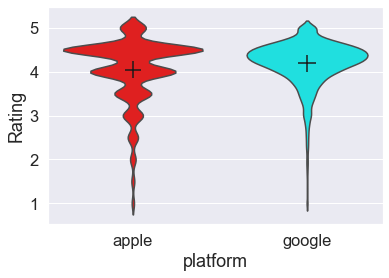

In [51]:
# creating a dictionary, `palette`, with one specific color per group:

sns.set(font_scale=1.5)
palette = {"google": "cyan", "apple": "red"}
s = [MeansRating[n]**4 for n in range(len(MeansRating))] # define size of mean marker as + sign
ax = sns.violinplot(x="platform", y="Rating", data=df1, inner=None,order=["apple", "google",], palette=palette)
plt.scatter(x=range(len(MeansRating)),y=MeansRating,c="k", marker = '+',s=s);


Here, the violin plot provides a little bit more information than what we obtained earlier in the analytical summary. It's clear that the none of the rating data is normally distributed. Both the Google Play app reviews and the Apple Store app reviews received relatively more high-end ratings from their respective users. Perhaps we've solved our brief already: there's no significant difference between Google Play app reviews and Apple Store app reviews. We do see, however, an ***observed difference*** here in terms of **only** the mean rating (also marked by + signs in the violin plots above): which is simply (4.191757 - 4.049697) = 0.14206. This is just the actual difference that we observed between the mean rating for apps from Google Play and the mean rating for apps from the Apple Store. Let's look at how we're going to use this observed difference to solve our problem (**Did Apple Store apps receive better reviews than Google Play apps?**) using a statistical test. We will first employ [Permutation Test](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/) (an example of it is [A/B testing](https://en.wikipedia.org/wiki/A/B_testing), or see this [link](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)), and then also use Bootstrap hypothesis test.

**Outline of Permutation Test:**
1. We'll assume that platform (i.e, whether the app was Google or Apple) really doesn’t impact on ratings.


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. The difference between these means will be called our permutation difference. The set of all these permutation difference is a great indicator of what the difference would be if our initial assumption in step 1 above were true and platform really doesn’t impact on ratings. 


5. To assess this, a **statistical** comparison is performed next. If the observed difference looks just like the simulated permutation differences, then we stick with the claim that actually, platform doesn’t impact the ratings. If instead, however, the permutation differences differ *significantly* from the observed difference, we'll conclude: something's going on; the platform does in fact have impact on ratings. 


6. As for what the definition of *significantly* is, we'll get to that. But this is just a brief summary of what we're going to do in the next section. Exciting!

If you want to look more deeply at the statistics behind this project, check out [this resource](https://www.springboard.com/archeio/download/4ea4d453b0b84014bcef287c50f47f00/).

## Stage 3 - Modelling

### 3a. Permutation Test Preliminaries
In permutation test,  **Null hypothesis** is just:

**H<sub>null</sub>**: Samples of Apple rating and samples of Google rating come from the same distribution.

For a two-sided test, we can define the **Alternative hypothesis** as:

**H<sub>alternative</sub>**: The two sets of samples do not come from the same distribution.

We're also going to pick **5% significance level**, i.e., $\alpha = 0.05$. 

### 3b. Getting the distribution of the data
Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept. 

There are many different statistical tests, all with different assumptions. Over the years as you keep on working on data science projects, you'll generate an excellent judgement about when to use which statistical tests. But in general, one of the most important things and possibly the first thing to determine is the **distribution of the data**.   

In [52]:
# Create a subset of the column 'Rating' by the different platforms.
# Call the subsets 'appleRating' and 'googleRating' 
appleRating = df1.loc[df['platform'] == 'apple']['Rating']
googleRating = df1.loc[df['platform'] == 'google']['Rating']


In [53]:
appleRating

0       4.0
1       4.0
2       3.5
3       4.0
4       4.5
       ... 
7192    4.5
7193    4.5
7194    4.5
7195    4.5
7196    5.0
Name: Rating, Length: 6268, dtype: float64

In [54]:
googleRating

7197     4.1
7198     3.9
7199     4.7
7200     4.5
7201     4.3
        ... 
18030    4.0
18032    4.5
18033    5.0
18035    4.5
18036    4.5
Name: Rating, Length: 9366, dtype: float64

We have already seen in the violin plot that the rating data are not normally distributed. We can verify it more formally here by using [`scipy.stats.normaltest()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).

In [55]:
# Using the stats.normaltest() method, get an indication of whether the apple data are 
# normally distributed
statistic, pvalue = stats.normaltest(appleRating)
alpha = 1e-3
print(f"p-value = {pvalue}")
print()
if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis that Apple rating comes from normal distribution can be rejected.")
else:
    print("The null hypothesis that Apple rating comes from normal distribution cannot be rejected.")

print()

p-value = 0.0

The null hypothesis that Apple rating comes from normal distribution can be rejected.



In [56]:
# Do the same with the google data. 
statistic, pvalue = stats.normaltest(googleRating)
alpha = 1e-3
print(f"p-value = {pvalue}")
print()
if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis that Google rating comes from normal distribution can be rejected.")
else:
    print("The null hypothesis that Google rating comes from normal distribution cannot be rejected.")

print()

p-value = 0.0

The null hypothesis that Google rating comes from normal distribution can be rejected.



<ins>Note</ins>: Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. See more details [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). Please be careful here. This null hypothesis, that the samples come from normal or Gaussian distribution, is different from the **Null hypothesis**, **H<sub>null</sub>**, that we defined in **Section 3a** above. Through ` scipy.stats.normaltest()`, we are simply verifying, as a sort of supplementary step, if the data are normally distributed or not.

In the above normality test, we get the p-values 0 for both tests. Thus, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. This is same as observation as we noted in violin plots.

As we did with violin plot, we can do similar thing again to check more explicitly the distribution of the data visually by plotting the histograms. Please note that a normal distribution has the following visual characteristics:
    - symmetric
    - unimodal (one hump)
As well as a roughly identical mean, median and mode. 

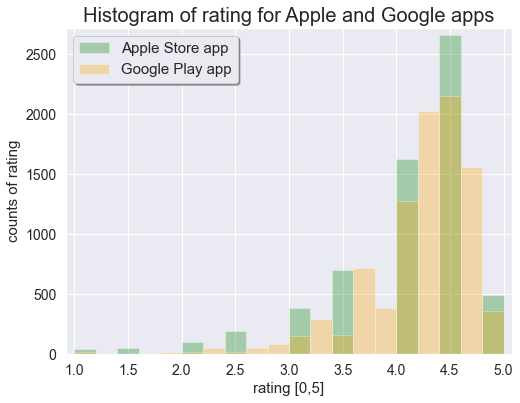

In [57]:
# Create a histogram of the apple and google reviews data
figure = plt.figure(figsize=(8, 6))

bins = 20
xlabel = f"rating [0,5]"
ylabel = f"counts of rating"
title = f"Histogram of rating for Apple and Google apps"
legend_loc = 'upper left'
plt.hist(appleRating, bins=bins, density=False, facecolor='green', alpha = 0.3, label='Apple Store app')
plt.hist(googleRating, bins=bins, density=False, facecolor='orange', alpha = 0.3, label='Google Play app')
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title(title,fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
legend = plt.legend(loc=legend_loc, shadow=True, fontsize=15)

# Set margins
plt.margins(0.02)

The plot above clearly illustrates that none of the distributions is Gaussian (or normal) because both of them are skewed left. We note here that means of the two distribution are close to each other but variance of Apple Store app reviews appear to be relatively larger because of a few extreme points in the left tail region. This is consistent with what we obtained earlier in analytical summary in **Section 2g**.

We further explore the data by checking Emperical Cumulative Distribution Functions (ECDFs) since they can also be useful in Exploratory Data Analysis (EDA). Let's plot the ECDFs of ratings of Apple Store app reviews and Google Play app reviews on the same plot.

In [58]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


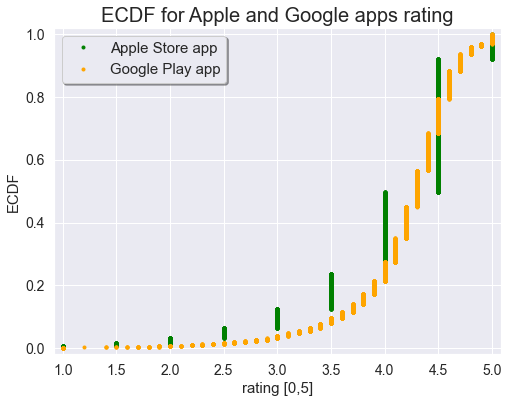

In [59]:
# Compute ECDFs
x_apple, y_apple = ecdf(appleRating)
x_google, y_google = ecdf(googleRating)

# Plot the ECDFs
figure = plt.figure(figsize=(8, 6))

plt.plot(x_apple, y_apple, marker='.', linestyle='none', color='green',label='Apple Store app')
plt.plot(x_google, y_google, marker='.', linestyle='none', color='orange',label='Google Play app')

xlabel = f"rating [0,5]"
ylabel = f"ECDF"
title = f"ECDF for Apple and Google apps rating"
legend_loc = 'upper left'
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title(title,fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=legend_loc, shadow=True, fontsize=15)

# Set margins
plt.margins(0.02)


The difference in two means is obvious again in the ECDF, but the difference in variances is not as obvious as it was in the histogram plot.

We have pretty good idea now that the **two distributions** of Apple user ratings and Google user ratings are **not similar**. But, is this observation just due to some random chance? In other words, are the two sets of user rating come from the same distribution but the apparent difference observed above is only due to two different sets of finite-sized samples? This can be answered by performing **permutation test**. We have already formulated the Null hypothesis, H<sub>null</sub> and the Alternative hypothesis, H<sub>alternative</sub>, in **Section 3a**. Let's now perform the permutation test.

### 3c. Permutation Test
Since the data aren't normally distributed, we're using a *non-parametric* test (i.e., permutation test) here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make.  

Check out more about permutations [here.](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/)

**Under the null hypothesis** (i.e., the samples of Apple rating and the samples of Google rating come from the same distribution), **any permutations of the combined data set** of two ratings are **equally likely**. This is the fundamental concept which will be used to carry out the permutation test. 

We will first choose a test statistic which is a single number that can be computed from the observed data and from the permuted data under the null hypothesis. The computed values of test statistic (one from simulated data and the other from real data) are next compared to test the null hypothesis. Here, we will define the test statistic as the difference of means of the Apple rating and Google rating. We will then compute this difference from the the simulated samples of Apple rating and the simulated samples of Google rating. Let us call it as **permutation difference**. The simulated samples of Apple rating and Google rating are obtained from the permutation of the combined dataset. The permutation difference will then be compared against the **observed difference** of the mean computed separately from the real data as summarized in **Outline of Permutation Test** at the end of **Section 2g**.

The comparison of the two differences (permutation difference and observed difference) is done by estimating a **p-value** and then comparing it with the **significance level** that we have already chosen as 0.05 in **Section 3a**. The p-value is defined as the fraction of simulated samples for which the test statistic (i.e., permutation difference) is at least as extreme as the **observed difference of the mean** of the real data. 


In [60]:
# Create a column called `Permutation1`, and assign to it the result of permuting 
# (shuffling) the Rating column.
# This assignment will use our numpy object's random.permutation() method.

def permutation_sample(length_data1,concatenated_data):
    """Generate a permutation sample from the concatenated data set."""

    # Permute the concatenated array: permuted_data
    # New code should use the permutation method of a default_rng() instance instead. 
    # Please see https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
    # and the Quick Start (https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).
    
    # Old version
    permuted_data = np.random.permutation(concatenated_data)

    # Do this (new version)
#     permuted_data = rng.permutation(concatenated_data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:length_data1]
    perm_sample_2 = permuted_data[length_data1:]

    return permuted_data, perm_sample_1, perm_sample_2


length_apple_data = len(appleRating)
length_google_data= len(googleRating)
print(f"length of samples of apple rating: {length_apple_data}")
print(f"length of samples of google rating: {length_google_data}")

seed = 41
np.random.seed(seed)
# rng = np.random.default_rng()
Permutation1, perm_sample_apple, perm_sample_google = permutation_sample(length_apple_data, df1['Rating'])

df1.insert(len(df1.columns), 'Permutation1', Permutation1, allow_duplicates=False)

# Call the describe() method on our permutation grouped by 'platform'. 
df1.groupby(by='platform')['Permutation1'].describe()


length of samples of apple rating: 6268
length of samples of google rating: 9366


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.130807,0.604021,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.137476,0.618876,1.0,4.0,4.3,4.5,5.0


In [61]:
# Lets compare with the previous analytical summary:
df1.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [62]:
# Compute the observed difference of the sample means (test statistic): obs_difference
obs_difference = np.mean(appleRating) - np.mean(googleRating)

# Compute the permutation difference of perm_sample_apple and perm_sample_google: permutation_diff
perm_diff = np.mean(perm_sample_apple) - np.mean(perm_sample_google)

print(f"Observed difference: {round(obs_difference,5)}")
print(f"Permutation difference: {round(perm_diff,5)}")

Observed difference: -0.14206
Permutation difference: -0.00667


The difference in the means for Permutation1 (-0.00667) now looks hugely different to our observed difference of -0.14206. It's sure starting to look like our observed difference is significant, and that the Null is false; **platform does have impact on ratings**. To explore this further, let us generate 10 permutation samples and visualize them graphically by plotting their ECDFs.

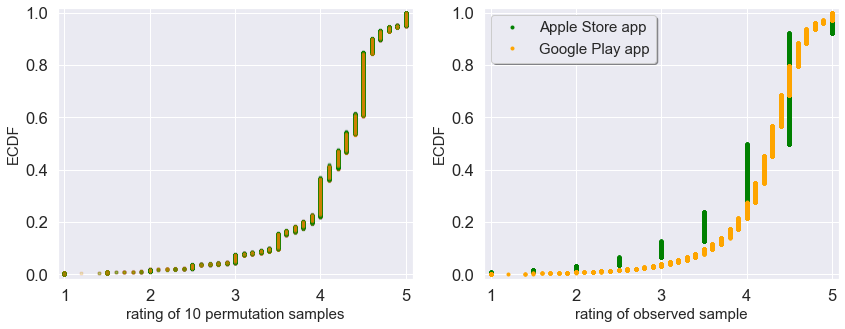

In [63]:
plt.figure(figsize=(14, 5))

seed = 101
np.random.seed(seed)
# rng = np.random.default_rng()

n_permutation_sample = 10
plt.subplot(121)
for _ in range(n_permutation_sample):
    # Generate permutation samples
    _, perm_sample_1, perm_sample_2 = permutation_sample(length_apple_data, df1['Rating'])


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none',color='green', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none',color='orange', alpha=0.02)
    

xlabel = f"rating of {n_permutation_sample} permutation samples"
ylabel = f"ECDF"
plt.margins(0.02)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)

# Create and plot ECDFs from original data
plt.subplot(122)
x_1, y_1 = ecdf(appleRating)
x_2, y_2 = ecdf(googleRating)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='green',label='Apple Store app')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='orange',label='Google Play app')

# Label axes, set margin, and show plot
xlabel = f"rating of observed sample"
ylabel = f"ECDF"
plt.legend(loc=legend_loc, shadow=True, fontsize=15)
plt.margins(0.02)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)

plt.show()

Notice that the ECDFs of 10 permutation samples of rating for both the platforms -- apple and goggle -- look prtetty similar to each other, but they look quite different from the ECDFs of the observed data, suggesting that the null hypothesis is not commensurate with the data. **Apple Store app rating and Google Play app rating are not identically distributed**.

But to be absolutely sure, let's create 10,000 permutations, calculate the mean ratings for Google apps and Apple apps for these 10,000 simulated samples, and then compute their difference as 10,000 permutation differences.

To carry out the steps above, we will define a function, `draw_perm_reps()`, to compute a permutation replicate which is a single value of the test statistic computed from a permutation sample generated by using the function `permutation_sample()` already explained above. We will use `draw_perm_reps()` to generate 10,000 permutation replicates as 10,000 values of the test statistic. The function, `draw_perm_reps()` will have call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, the input argument `func` will be another function that takes two arrays as arguments (i.e, `perm_sample_1` and `perm_sample_2`). In most circumstances, `func` will be a function written by yourself. In our case, `func` will calculate the difference of means of `perm_sample_1` and `perm_sample_2`.


In [64]:
# Let's create a vector with the differences - that will be the distibution of the Null.

# First, make a list called difference.
# _ _ _

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
# _ _ _

# The scheme explained in this cell is done slightly differently using function to make it
# more convenient and useful for possible future use.

In [65]:
def draw_perm_reps(length_data1,concatenated_data, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        _, perm_sample_1, perm_sample_2 = permutation_sample(length_data1,concatenated_data)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Now define the function `func` below to compute the test statistic
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff


# Draw 10,000 permutation differences: perm_diff
seed = 96
np.random.seed(seed)
perm_diffs = draw_perm_reps(length_apple_data, df1['Rating'],diff_of_means, size=10000)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(perm_diffs,[2.5, 97.5])

# Print the results
print('Observed difference of means =', obs_difference)
print('95% confidence interval =', conf_int)


Observed difference of means = -0.14206054745123442
95% confidence interval = [-0.01931974  0.01924323]


The 95% confidence interval computed above makes clear that the observed difference of means does not fall within the 95% confidence interval. In fact, the observed difference is quite far away from the 95% confidence interval, suggesting that we are possibly going to get a very small p-value. This will then mean that the **null hypothesis**, **H<sub>null</sub>**, can be rejected.

Recall that, the p-value can be computed as the fraction of simulated samples for which the test statistic  (here, it is the difference of means) is at least as extreme as the **observed difference of the mean** of the real data. Since we computed the observed difference as a negative value (`obs_difference = -0.14206054745123442`), we can check what is the fraction of 10,000 permuted samples for which the permutation difference of means are less than the observed difference of the mean. This will however make it a one-sided test. At the beginning, we considered two-sided test to define the alternative hypothesis. So, we would also compute the two-sided p-value by computing the fraction of 10,000 permuted samples for which the permutation difference of means are less than the observed difference of the mean **plus** the permutation difference of means are more than the absolute value of the observed difference of the mean.

In [66]:
# Compute the p-value by comparing perm_diffs with obs_difference. 
# Use less than equal ('<=') because observed difference obs_difference 
# is negative (= -0.14206054745123442). This is one-sided test.
p = np.sum(perm_diffs <= obs_difference) / len(perm_diffs)

# Print p-value
print('One-sided p-value =', p)

# For two-sided test as decided when defining the alternative hypothesis, 
# we do the following by comparing all the perm_diffs with the absolute value of
# obs_difference.

p = p + (np.sum(perm_diffs >= abs(obs_difference)) / len(perm_diffs))

# Print p-value
print('Two-sided p-value =', p)

One-sided p-value = 0.0
Two-sided p-value = 0.0


As guessed above from the result of 95% confidence interval, we get both the p-values as 0 which is less than the significance level of 0.05. This suggests that there is a statistically significant difference between the distributions of samples of Apple rating and samples of Google rating. Therefore, the **null hypothesis**, **H<sub>null</sub>**, that samples of Apple rating and samples of Google rating come from the same distribution, **can be rejected**. We **accept the alternate hypothesis**, **H<sub>alternative</sub>**, that the two sets of samples do not come from the same distribution. In other words, we conclude that the difference in apple and google rating actually depends on the platform.

We can also plot the histogram of `perm_diffs` and superimpose on it the observed difference of means to check visually how extreme this observed difference is.

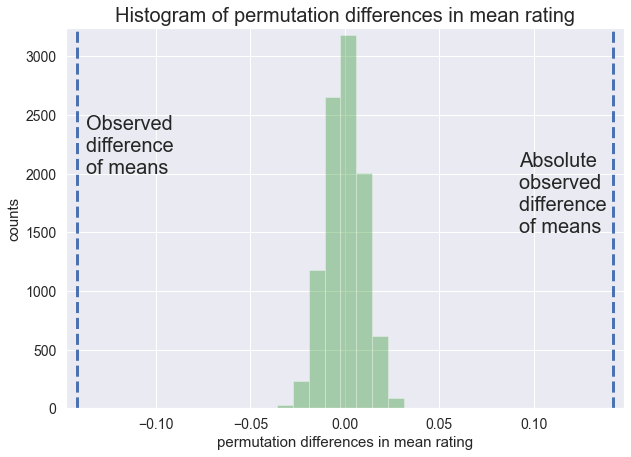

In [67]:
figure = plt.figure(figsize=(10, 7))

xlabel = f"permutation differences in mean rating"
ylabel = f"counts"
title = f"Histogram of permutation differences in mean rating"
plt.hist(perm_diffs, density=False, facecolor='green', alpha = 0.3)
plt.axvline(obs_difference, color='b',linestyle='--',linewidth=3)
plt.axvline(abs(obs_difference), color='b',linestyle='--',linewidth=3)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title(title,fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.text((obs_difference+0.005), 2000, f"Observed \ndifference \nof means",fontsize=20)
plt.text(abs(obs_difference)-0.05, 1500, f"Absolute \nobserved \ndifference \nof means",fontsize=20)

# Set margins
plt.margins(0.02)

The observed difference is very far away from the tail regions of the histogram of the permutation differences, `perm_diffs`. This most likely cannot happen due to some random chance. The Apple Store app rating and Google Play app rating clearly depends on the platform and their distributions are not identical, which is consistent with the alternate hypothesis, **H<sub>alternative</sub>**.

***
#### Digress
There is another Python library, [Mlxtend](http://rasbt.github.io/mlxtend/) (machine learning extensions), which can be used to carry out the Permutation test by writing a one-line code. Let's check it as well to see how it performs.

In [68]:
seed = 96

func_l=lambda x, y: -1*diff_of_means(x,y)
p = permutation_test(appleRating, googleRating,func = func_l, method='approximate',num_rounds=10000,seed=seed)
# Print p-value
print(f"One-sided left tail p-value = {p} ≈ {round(p,4)}")
print()


def func_r(x,y):
    if diff_of_means(x,y) - obs_difference == 0:
        # When comparing the observed difference of the mean from real data,
        # return its absolute value to obtain the one-sided right tail p-value
        print("Extracting observed statistic... ")
        diff = abs(obs_difference)
    else:
        diff = diff_of_means(x,y)
    
    return diff

p = permutation_test(appleRating, googleRating, func=func_r, method='approximate',num_rounds=10000,seed=seed)
# Print p-value
print(f"One-sided right tail p-value = {p} ≈ {round(p,4)}")
print()


# No need to mention explicitly the function to compute the test statistic.
# This is default option and do the two-sided test
p = permutation_test(appleRating, googleRating, method='approximate',num_rounds=10000,seed=seed)
# Print p-value
print(f"Two-sided p-value = {p} ≈ {round(p,4)}")

One-sided left tail p-value = 9.999000099990002e-05 ≈ 0.0001

Extracting observed statistic... 
One-sided right tail p-value = 9.999000099990002e-05 ≈ 0.0001

Two-sided p-value = 9.999000099990002e-05 ≈ 0.0001


Ok. So, we get essentially the same result. The p-values are very small or close to zero. Let's move on to the next section.

***

Even if the two distributions are not same as we concluded above, we see from the histogram plots and ECDFs of the two data sets in **Section 3b** that they significantly overlap over each other. We initially thought (see **Section 2g**) that perhaps there's no significant difference between Google Play app reviews and Apple Store app reviews because the mean of 4.049697 for apple rating and the mean of 4.191757 for google rating don't **seem** all that different! Since means of two different distributions can be similar, we might still wonder if the observed difference in means is simply due to some random chance. Think of uniform distribution supported over $[-1,1]$ and standard normal distribution. Both of them have identical mean of 0. We will now investigate this case by using the concept of two-sample **bootstrap hypothesis test** for the difference of means.

### 3d. Two-sample Bootstrap Hypothesis Test for Difference of Means


Here, we defined our **Null hypothesis** as:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

We will consider here now a **one-sided test** with the following **Alternate hypothesis**, which is more interesting:

**H<sub>alternative</sub>**: the mean rating of Apple Store app reviews is less than mean rating of Google Play app reviews.

Here again, let us choose a **significance level** of 0.05. 

We now want to test the hypothesis that apple rating and google rating have similar mean rating, but not necessarily the same distribution (we already concluded that the two distributions are different). We **cannot** employ the permutation test here since the underlying assumption of the permutation test (i.e., the null hypthesis) is that two data sets come from the same distribution. In Section 3c, based on that assumption, we first **combined** samples of apple rating and samples of google rating, and then shuffle (permute) them. From the permuted samples of the combined set, we separated samples of the apple rating and samples of the google rating to compute their permutation differences of means. This permutation process of the combined dataset cannot be followed now in this current bootstrap hypothesis test since we are **not** assuming that the two distributions are same.

To do the two-sample bootstrap test here, we will **not** combine the two sets of samples. Instead, we will first shift both arrays (i.e., the two sets of samples of rating) individually so that both sets of samples have the identical mean. This needs to done because we are simulating the hypothesis that their means are, in fact, equal. We will then draw respective set of bootstrap samples out of the individually shifted arrays and compute their difference of means. Each  difference of means constitutes a **bootstrap replicate** of the test statistic, and we will generate many of them. As usual, the p-value for this **one-sided test** is the fraction of replicates with a difference in means less than or equal to what was computed earlier as `obs_difference`.

In [69]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


Calculate the test statistic now. We will generate 10,000 bootstrap replicates of the test statistic.

In [70]:
# Get bootstrap replicates of means
seed = 1
np.random.seed(seed)
bs_replicates_apple = draw_bs_reps(appleRating,np.mean,size = 10000)
bs_replicates_google = draw_bs_reps(googleRating,np.mean,size = 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_apple - bs_replicates_google

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5, 97.5])

# Print the results
print('Observed difference of means =', obs_difference)
print('95% confidence interval =', conf_int)


Observed difference of means = -0.14206054745123442
95% confidence interval = [-0.16247183 -0.12142439]


The plots of the histogram and the ECDF in **Section 3b** along with determination of the 95% confidence interval as shown above might make it apparent that there is possibly no difference of mean ratings between the Apple Store app reviews and the Google Play app reviews even though the two distributions are not the same. But is this similarity of means just due to some random chance? What is the probability that we would get the observed difference of mean ratings if the two means were actually the same?

Be careful here! As emphasized above, the hypothesis we are testing here is **not** that both the Apple Store app reviews and the Google Play app reviews come from the same distribution. For that we could use a permutation test as we did in the previous section. The null hypothesis here is that the means are equal. To perform this hypothesis test, we need to first shift the two data sets so that they have the same mean (which we did **not** do intentionally in the above Cell) and only then we could use bootstrap sampling to compute the difference of means, which will do now correctly.

In [71]:
# Compute mean of combined data set, df1, that we formed earlier
combined_mean = np.mean(df1['Rating'])
print('combined_mean =', combined_mean)

# IMPORTANT: Shift the samples
appleRating_shifted = appleRating -  np.mean(appleRating) + combined_mean
googleRating_shifted = googleRating -  np.mean(googleRating) + combined_mean

# Get bootstrap replicates of shifted data sets
seed = 125
np.random.seed(seed)
bs_replicates_apple = draw_bs_reps(appleRating_shifted,np.mean,10000)
bs_replicates_google = draw_bs_reps(googleRating_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_apple - bs_replicates_google

# Compute the one-sided p-value. Use less than equal ('<=') because observed obs_difference 
# is negative (= -0.14206054745123442).
p = np.sum(bs_diff_replicates <= obs_difference) / len(bs_diff_replicates)

# Print p-value
print('One-sided p-value =', p)


combined_mean = 4.134802353844191
One-sided p-value = 0.0


We get the p-value of 0 less than the significance level of 0.05. Thus, we conclude thhat there is a statistically significant difference. Therefore, the null hypothesis, **H<sub>null</sub>**, that the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform), can be **rejected**. We **accept** the alternate hypothesis, **H<sub>alternative</sub>**, that **the mean rating of Apple Store app reviews is less than mean rating of Google Play app reviews**.

As done in the previous section, let us plot the histogram of simulated **bootstrap replicates** of difference of means and superimpose on it the observed difference of means to check visually how extreme this observed difference is.

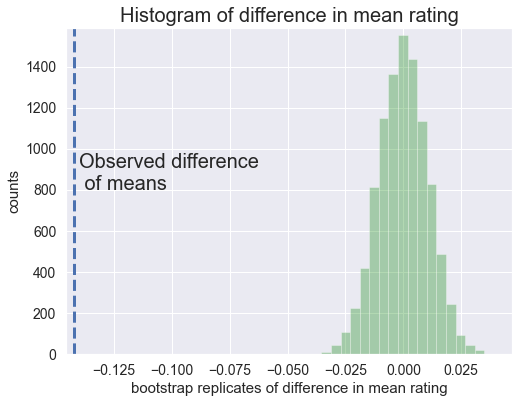

In [72]:
figure = plt.figure(figsize=(8, 6))

bins = 20
xlabel = f"bootstrap replicates of difference in mean rating"
ylabel = f"counts"
title = f"Histogram of difference in mean rating"
plt.hist(bs_diff_replicates, bins=bins, density=False, facecolor='green', alpha = 0.3)
plt.axvline(obs_difference, color='b',linestyle='--',linewidth=3)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title(title,fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.text((obs_difference+0.002), 800, f"Observed difference\n of means",fontsize=20)

# Set margins
plt.margins(0.02)

We note again that the observed difference is very far away from the tail region of the histogram, implying that it is not due to some random chance and the observed difference does depend on the platform. This is consistent with the one-sided alternate hypothesis, **H<sub>alternative</sub>** that states that the average rating of Apple Store app reviews is less than average rating of Google Play app reviews.

## Stage 4 -  Evaluating and concluding
### 4a. What is our conclusion?

What do we know? 

Recall: The p-value of our observed data is just the proportion of the data given the null that's at least as extreme as that observed data.

As a result, we counted what fraction (i.e., p-value) of simulated replicates of difference in means is at least as extreme as our observed difference.

Given that we chose a significance level of 0.05 and obtained the p-value as 0 in both the cases (permutation test and two-sample bootstrap hypothesis test), we rejected the null hypothesis.

We can plot the normalized histograms of simulated differences of means to summarize the results of both the tests along with the observed difference from the real data.

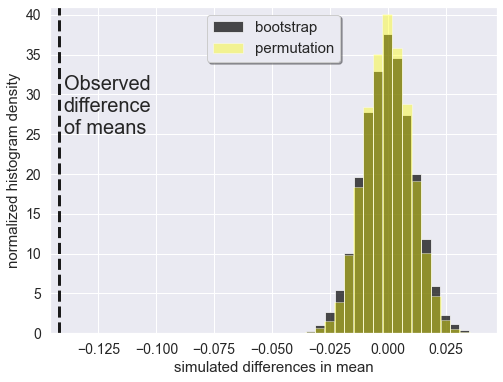

In [73]:
# Create a histogram of the apple and google reviews data
figure = plt.figure(figsize=(8, 6))

bins = 20
xlabel = f"simulated differences in mean"
ylabel = f"normalized histogram density"
legend_loc = 'upper center'
plt.hist(bs_diff_replicates, bins=bins, density=True, facecolor='black', alpha = 0.7,label='bootstrap')
plt.hist(perm_diffs, bins=bins, density=True, facecolor='yellow', alpha = 0.4,label='permutation')
plt.axvline(obs_difference, color='k',linestyle='--',linewidth=3)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
legend = plt.legend(loc=legend_loc, shadow=True, fontsize=15)

plt.text((obs_difference+0.002), 25, f"Observed \ndifference\nof means",fontsize=20)

# Set margins
plt.margins(0.02)

The observed difference is no where close to the tail region of the histograms suggesting that the observed difference of means is statistically significant and not due to any random chance.

### 4b. What is our decision?
Since we computed the p-value of our observed data as 0, it means that zero differences are at least as extreme as our observed difference!

It doesn't matter which significance level we pick; our observed data depends on the platform, and we reject the Null hypothesis.

Since google platform has statistically significant impact on better ratings, we should advise our client to integrate **only Google Play** into their operating system interface.

### 4c. Other statistical tests, and next steps
The two tests we used here are the Permutation test (null hypthesis: two distributions are identical) and Bootstrap hypothesis test (null hypothesis: average ratings of two reviews are same). This was appropriate because our data were not normally distributed! 

Professor Spiegelhalter's book describe many different statistical tests, all with different assumptions. Check them out!